In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

# Question 1

# Look at the data given below. Plot the data, find the outliers and find out μ,σ,σ^2

Name of company Measure X \ Allied Signal 24.23% \ Bankers Trust 25.53% \ General Mills 25.41% \ ITT Industries 24.14%\ J.P.Morgan & Co. 29.62%\ Lehman Brothers 28.25%\ Marriott 25.81%\ MCI 24.39%\ Merrill Lynch 40.26%\ Microsoft 32.95%\ Morgan Stanley 91.36%\ Sun Microsystems 25.99%\ Travelers 39.42%\ US Airways 26.71%\ Warner-Lambert 35.00%\

In [17]:
measure_x = [24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00]
name_of_company = ['Allied Signal','Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.',
                   'Lehman Brothers','Marriott','MCI','Merill Lynch','Microsoft','Morgan Stanley',
                   'Sun Microsystems','Travelers','US Airways','Warner-Lambert']

In [18]:
df = pd.DataFrame(list(zip(name_of_company, measure_x)),columns=['Company' ,'Measure_X'])
df

,Company,Measure_X
0,Allied Signal,24.23
1,Bankers Trust,25.53
2,General Mills,25.41
3,ITT Industries,24.14
4,J.P.Morgan & Co.,29.62
5,Lehman Brothers,28.25
6,Marriott,25.81
7,MCI,24.39
8,Merill Lynch,40.26
9,Microsoft,32.95


In [19]:
df.describe()

,Measure_X
count,15.000000
mean,33.271333
std,16.945401
min,24.140000
25%,25.470000
50%,26.710000
75%,33.975000
max,91.360000


In [20]:
df.var()

Measure_X    287.146612
dtype: float64

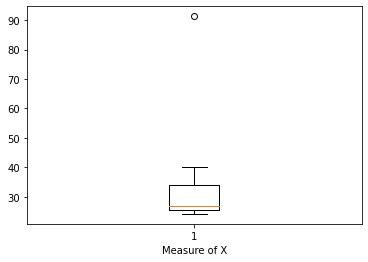

In [21]:
plt.boxplot(x='Measure_X' ,data=df)
plt.xlabel('Measure of X')
plt.show()

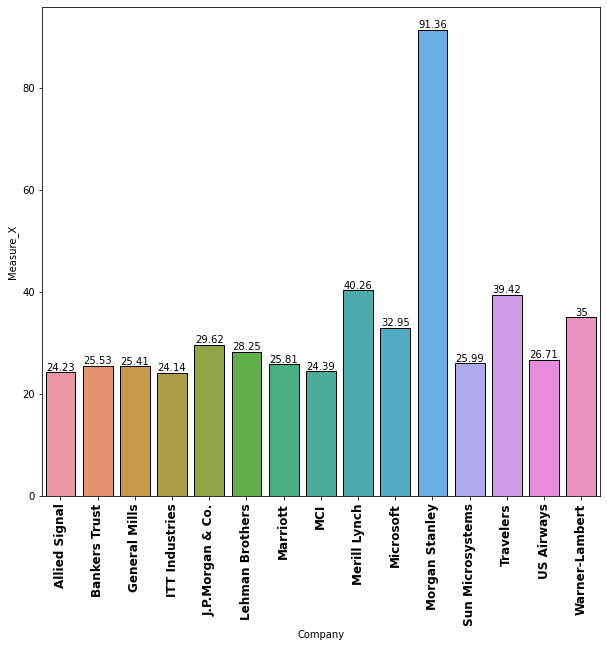

In [28]:
plt.figure(figsize=(10,9))
ax = sns.barplot(y = 'Measure_X', x= 'Company' ,data=df ,  edgecolor='black')
plt.xticks(rotation=90, fontsize=12 , fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()


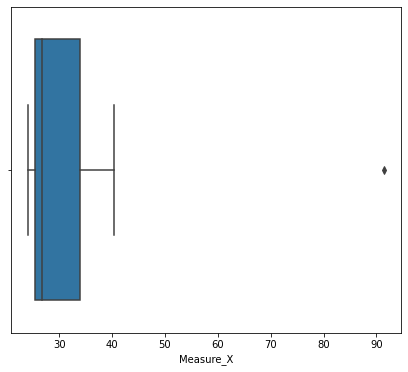

In [24]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Measure_X', data=df)
plt.show()

In [50]:
measure_x = pd.Series(measure_x)
Q1 = np.quantile(measure_x,0.25)
Q3 = np.quantile(measure_x,0.75)
med = np.median(measure_x)
IQR = Q3 -Q1
upper_bound = Q3 +(1.5*IQR)
lower_bound = Q1 -(1.5*IQR)
print('First Quantile=',Q1,'Second Quantile=',med,'Third Quantile=',Q3,'Inter-Quantile Range=', IQR,
    'Upper Whisker=', upper_bound, 'Lower Whisker=', lower_bound)
Outliers = measure_x[(measure_x >= upper_bound) | (measure_x <= lower_bound)] 
print('The outlier in the boxplot are:',Outliers)

First Quantile= 25.47 Second Quantile= 26.71 Third Quantile= 33.975 Inter-Quantile Range= 8.505000000000003 Upper Whisker= 46.7325 Lower Whisker= 12.712499999999995
The outlier in the boxplot are: 10    91.36
dtype: float64


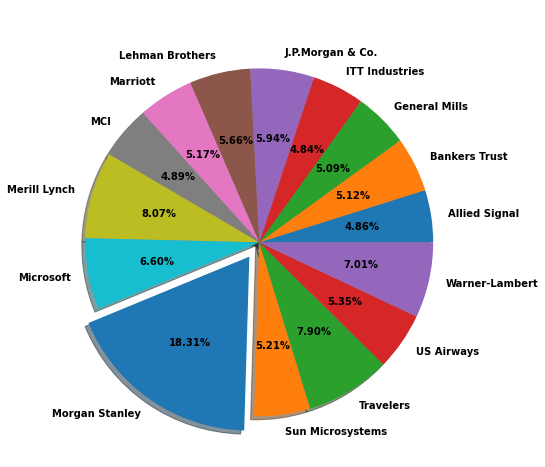

In [53]:
plt.figure(figsize = (8,8))
plt.pie('Measure_X', labels ='Company', data=df ,  autopct= '%.2f%%',shadow = True,
        explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0],
        textprops = {'size':'medium',
                   'fontweight':'bold',
                   'color':'black'})
plt.title('Name of Companies with respect to X', fontsize = 16, fontweight = 'bold', color='white')
plt.savefig('Piechart.png')
plt.show()